In [4]:
#Install Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [5]:
#load data_set
df=pd.read_csv("Weather_Data.csv")
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [6]:
#basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [7]:
#number of rows and columns in the dataset
df.shape

(8784, 8)

In [8]:
#descriptive statistics
df.describe(include='all')

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
count,8784,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784
unique,8784,NaN,NaN,NaN,NaN,NaN,NaN,50
top,1/1/2012 0:00,NaN,NaN,NaN,NaN,NaN,NaN,Mainly Clear
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,2106
mean,NaN,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623,NaN
std,NaN,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005,NaN
min,NaN,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000,NaN
25%,NaN,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000,NaN
50%,NaN,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000,NaN
75%,NaN,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000,NaN


In [7]:
#categorical variables
df.value_counts()

Date/Time        Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  Visibility_km  Press_kPa  Weather     
1/1/2012 0:00    -1.8    -3.9              86         4                8.0            101.24     Fog             1
6/1/2012 12:00    19.3    3.3              35         20               48.3           101.32     Cloudy          1
5/9/2012 7:00     14.3    12.5             89         15               4.8            100.12     Fog             1
5/9/2012 8:00     14.3    12.3             88         17               6.4            100.12     Fog             1
5/9/2012 9:00     14.0    12.3             89         9                4.0            100.10     Drizzle,Fog     1
                                                                                                                ..
12/8/2012 3:00    2.1    -1.5              77         6                25.0           101.18     Cloudy          1
12/8/2012 2:00    2.0    -1.9              75         7                25.0          

In [8]:
#missing values
missing_values = df.isnull().sum()
print(missing_values)

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64


In [10]:
#data types
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [11]:
#columns
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [12]:
#unique values
df.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

In [13]:
#determines duplicated rows as returned by pandas
df.duplicated().sum()

0

In [14]:
#descriptive statistics for the numerical columns 
df.describe(include=[int, float])

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Frequency')

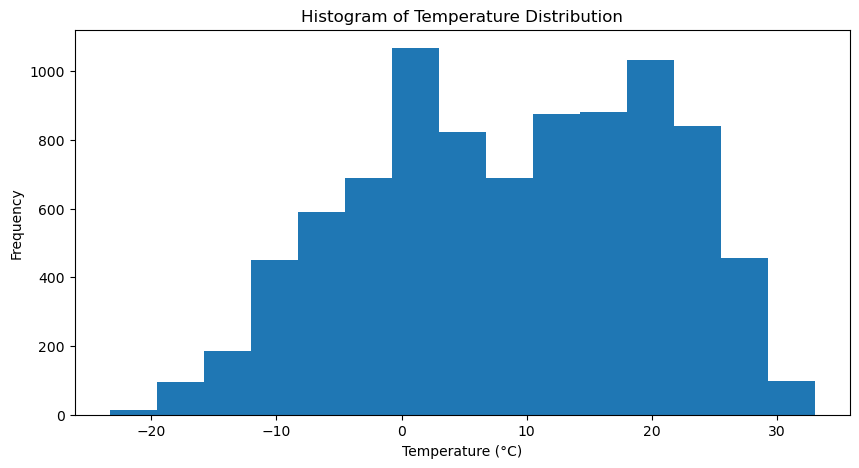

In [24]:
#Data Visualization
#Histogram
df['Temp_C'].plot.hist(bins=15, figsize=(10,5))
plt.title('Histogram of Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Percentage Relative Humidity')

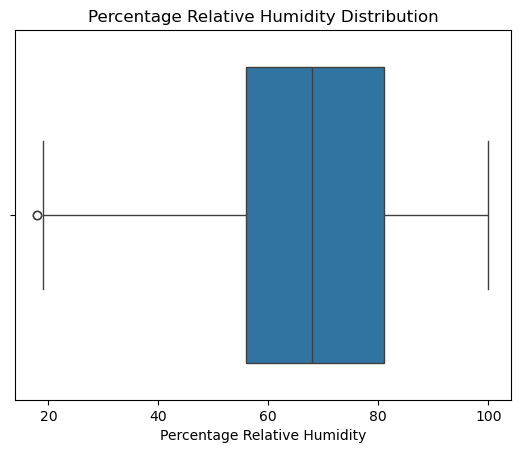

In [25]:
#box plot (Rel_Hum%)
sns.boxplot(x=df['Rel Hum_%'])
plt.title('Percentage Relative Humidity Distribution')
plt.xlabel('Percentage Relative Humidity')

In [26]:
print(df['Rel Hum_%'].describe())

count    8784.000000
mean       67.431694
std        16.918881
min        18.000000
25%        56.000000
50%        68.000000
75%        81.000000
max       100.000000
Name: Rel Hum_%, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Percentage Relative Humidity')

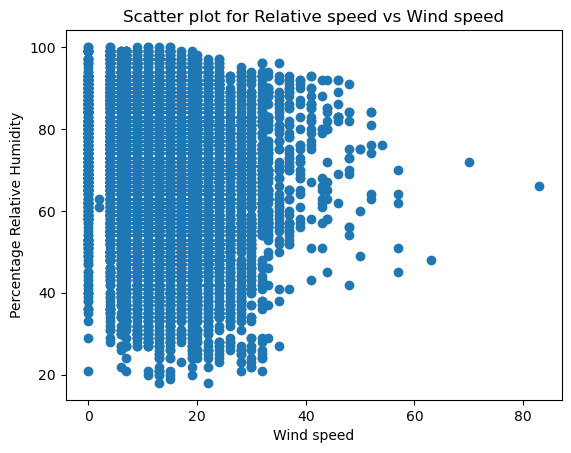

In [28]:
#Scatter plot to illustrate the relationship between relative humidity and weed speed
plt.scatter(x=df['Wind Speed_km/h'],y=df['Rel Hum_%'])
plt.title('Scatter plot for Relative speed vs Wind speed')
plt.xlabel('Wind speed')
plt.ylabel('Percentage Relative Humidity')

Text(0, 0.5, 'Percentage Relative Humidity')

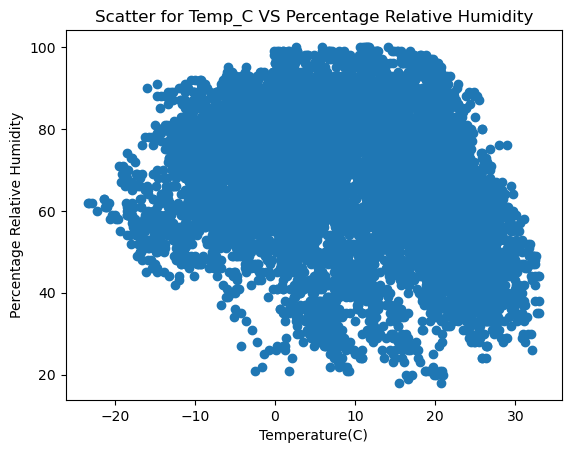

In [9]:
#scatter plot to determine the relationship between relative humidity and temperature
plt.scatter(x=df['Temp_C'],y=df['Rel Hum_%'])
plt.title('Scatter for Temp_C VS Percentage Relative Humidity')
plt.xlabel('Temperature(C)')
plt.ylabel('Percentage Relative Humidity')

In [13]:
#Time series between time and temperature
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['Date/Time']

0      2012-01-01 00:00:00
1      2012-01-01 01:00:00
2      2012-01-01 02:00:00
3      2012-01-01 03:00:00
4      2012-01-01 04:00:00
               ...        
8779   2012-12-31 19:00:00
8780   2012-12-31 20:00:00
8781   2012-12-31 21:00:00
8782   2012-12-31 22:00:00
8783   2012-12-31 23:00:00
Name: Date/Time, Length: 8784, dtype: datetime64[ns]

Text(0, 0.5, 'Temperature (C)')

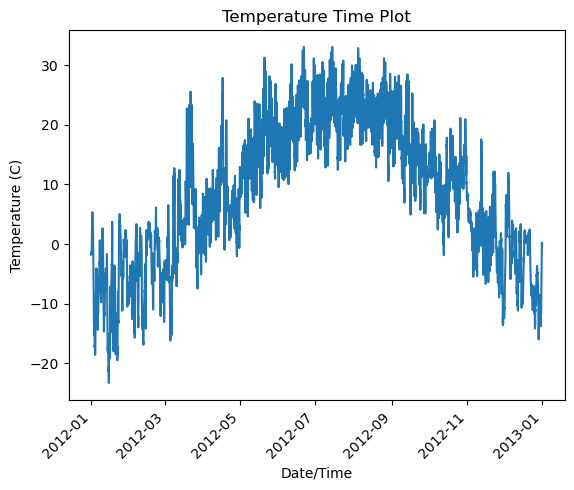

In [14]:
plt.plot(df['Date/Time'], df['Temp_C'])
plt.xticks(rotation=45, ha='right')
plt.title('Temperature Time Plot')
plt.xlabel('Date/Time')
plt.ylabel('Temperature (C)')

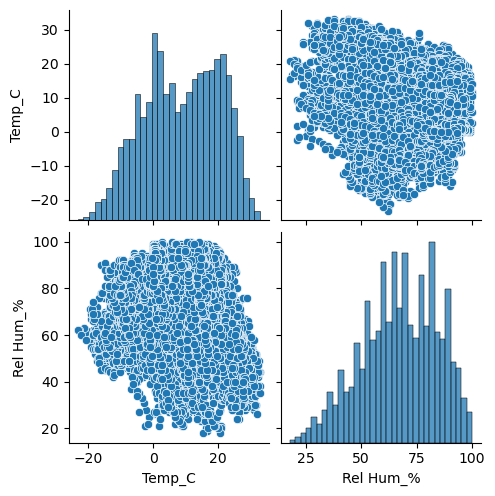

In [18]:
sns.pairplot(df[['Temp_C', 'Rel Hum_%']])

In [21]:
#Correlatin matrix
From the correlation matrix above: Temperature and dew point temperature have positive relationship, There is a negative relationship between relative humidity and temperature
numeric_df = df.select_dtypes(include=['number'])

In [24]:
correlation_matrix = numeric_df.corr()
print('Correlation matrix:')
print(correlation_matrix)

Correlation matrix:
                    Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
Temp_C            1.000000          0.932714  -0.220182        -0.061876   
Dew Point Temp_C  0.932714          1.000000   0.139494        -0.095685   
Rel Hum_%        -0.220182          0.139494   1.000000        -0.092743   
Wind Speed_km/h  -0.061876         -0.095685  -0.092743         1.000000   
Visibility_km     0.273455          0.050813  -0.633683         0.004883   
Press_kPa        -0.236389         -0.320616  -0.231424        -0.356613   

                  Visibility_km  Press_kPa  
Temp_C                 0.273455  -0.236389  
Dew Point Temp_C       0.050813  -0.320616  
Rel Hum_%             -0.633683  -0.231424  
Wind Speed_km/h        0.004883  -0.356613  
Visibility_km          1.000000   0.231847  
Press_kPa              0.231847   1.000000  


<Axes: >

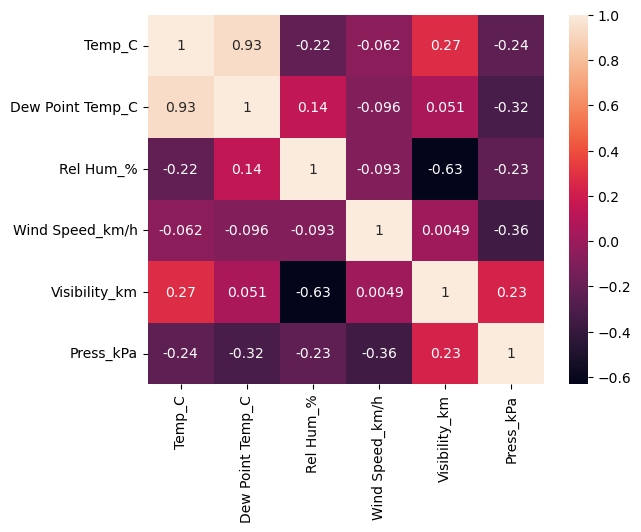

In [26]:
sns.heatmap(correlation_matrix, annot=True)

In [28]:
weather_vis = df.groupby('Weather')['Visibility_km'].value_counts().sort_values(ascending=False)
weather_vis

Weather                 Visibility_km
Mainly Clear            48.3             871
Clear                   25.0             856
Mostly Cloudy           25.0             785
Mainly Clear            25.0             762
Cloudy                  25.0             711
                                        ... 
Freezing Drizzle        4.8                1
Moderate Rain,Fog       6.4                1
Drizzle,Fog             1.0                1
Rain,Snow,Ice Pellets   4.8                1
Thunderstorms,Rain,Fog  4.8                1
Name: count, Length: 243, dtype: int64

In [29]:
df.groupby('Weather')['Visibility_km'].value_counts().max()

871

In [ ]:
#Insights gained
The increase in temperature affects the dew point.

From january to july temperature starts increasing as we go to the next month then from august to december the temperature starts to decrease.

The visibility is high when the weather is Mainly Clear.